In [1]:
import cv2
from ultralytics import YOLO
from IPython.display import display
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = YOLO("yolo11n.pt")

In [3]:
colors = [(255, 87, 51), (51, 255, 87), (51, 87, 255), (255, 51, 161), (161, 51, 255), (51, 255, 241), (241, 255, 51), (255, 140, 51), (51, 168, 255), (168, 255, 51), (255, 51, 51), (51, 255, 140), (140, 51, 255), (255, 51, 241), (241, 51, 255), (51, 255, 178), (178, 51, 255), (255, 178, 51), (51, 212, 255), (212, 255, 51), (255, 51, 102), (102, 51, 255), (51, 255, 102), (255, 102, 51), (51, 102, 255), (102, 255, 51), (255, 51, 204), (204, 51, 255), (51, 255, 204), (204, 255, 51), (255, 153, 51), (153, 51, 255), (51, 255, 153), (153, 255, 51), (255, 51, 51), (51, 255, 255), (255, 255, 51), (255, 51, 255), (51, 51, 255), (255, 170, 51), (170, 51, 255), (51, 255, 170), (170, 255, 51), (255, 68, 170), (68, 170, 255), (170, 255, 68), (255, 85, 170), (85, 170, 255), (170, 255, 85), (255, 102, 170), (102, 170, 255), (170, 255, 102), (255, 119, 170), (119, 170, 255), (170, 255, 119), (255, 136, 170), (136, 170, 255), (170, 255, 136), (255, 153, 170), (153, 170, 255), (170, 255, 153), (255, 170, 153), (170, 153, 255), (153, 255, 170), (255, 170, 187), (170, 187, 255), (187, 255, 170), (255, 187, 170), (187, 170, 255), (170, 255, 187), (255, 204, 170), (204, 170, 255), (170, 255, 204), (255, 221, 170), (221, 170, 255), (170, 255, 221), (255, 238, 170), (238, 170, 255), (170, 255, 238), (255, 255, 255)]

0: 640x480 4 persons, 1 bus, 214.8ms
Speed: 27.9ms preprocess, 214.8ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 480)


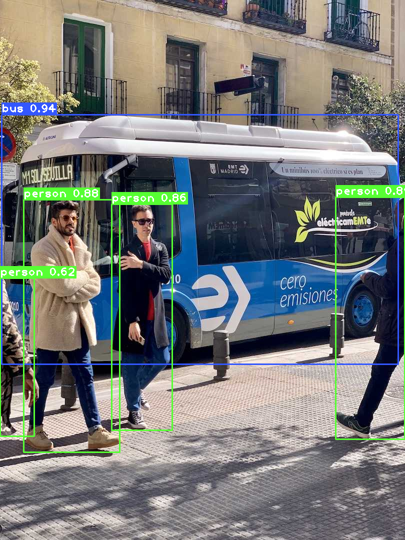

In [ ]:
image = cv2.imread("./bus.jpg")

results = model(image)

name_to_color = {}

for result in results:
    # bounding box (top-left-x, top-left-y, bottom-right-x, bottom-right-y)
    xyxy = np.asarray(result.boxes.xyxy, dtype="int")
    # class names
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]
    # confidence scores
    confs = np.asarray(result.boxes.conf, dtype="float32")
    
    
    for box, name, conf in zip(xyxy, names, confs):
      (x, y, x2, y2) = box
      
      if name not in name_to_color:
          name_to_color[name] = colors[len(name_to_color) % len(colors)]
          
      color = name_to_color[name]
          
      cv2.rectangle(image, (x, y), (x2, y2), color, 2)
      
      text = f"{name} {conf:.2f}"
      font = cv2.FONT_HERSHEY_PLAIN
      font_scale = 1.5
      font_thickness = 2
      
      text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
      text_w, text_h = text_size
      cv2.rectangle(image, (x, y-text_h-10), (x + text_w, y), color, -1)
      cv2.putText(image, text, (x, y-5), font, font_scale, (255, 255, 255), font_thickness)

cv2.imwrite("bus_yolo.jpg", image)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w = image_rgb.shape[:2]
scale = 0.5
new_size = (int(w * scale), int(h * scale))
resized = Image.fromarray(image_rgb).resize(new_size)
display(resized)


In [175]:
cap = cv2.VideoCapture("./vid.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
totalNoFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
durationInSeconds = totalNoFrames / fps

print(f"FPS: {fps}, Total Frames: {totalNoFrames}, Duration: {durationInSeconds:.2f} seconds")

while cap.isOpened():
    success, frame = cap.read()

    if success:
        results = model.track(frame, persist=True)
        annotated_frame = results[0].plot()
        cv2.imshow("YOLO11 Tracking", annotated_frame)
    else:
        break

cap.release()
cv2.destroyAllWindows()

FPS: 23.976023976023978, Total Frames: 285.0, Duration: 11.89 seconds

0: 640x384 2 cars, 1 traffic light, 53.5ms
Speed: 1.3ms preprocess, 53.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 1 traffic light, 43.5ms
Speed: 2.2ms preprocess, 43.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 1 traffic light, 42.4ms
Speed: 1.2ms preprocess, 42.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 1 traffic light, 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 35.7ms
Speed: 1.1ms preprocess, 35.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 33.4ms
Speed: 1.1ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 36.5ms
Speed: 1.7ms preprocess, 36.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 38

In [176]:
results = model.track("./vid.mp4", show=False)

print("\n\nResults: \n\n")

data_by_frame = {}

for frame_i, r in enumerate(results):
  ids = r.boxes.id.tolist() if r.boxes.id is not None else []
  xyxy = r.boxes.xyxy.tolist() if r.boxes.xyxy is not None else []
  names = [r.names[cls.item()] for cls in r.boxes.cls.int()]
  confs = r.boxes.conf.tolist() if r.boxes.conf is not None else []
  
  data_by_frame[frame_i] = {
      "ids": ids,
      "xyxy": xyxy,
      "names": names,
      "confs": confs
  }
    
  print(f"Frame {frame_i}:")
  print(f"Ids: {ids}")
  print(f"Class Names: {names}")
  print(f"Confidence Scores: {confs}")
  print(f"Bounding Box: {xyxy}")
  print("\n")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/285) /Users/kushkhanna/Documents/GitHub/solo-tech-project-2/vid.mp4: 640x384 2 cars, 1 traffic light, 43.0ms
video 1/1 (frame 2/285) /Users/kushkhanna/Documents/GitHub/solo-tech-project-2/vid.mp4: 640x384 2 cars, 1 traffic light, 36.2ms
video 1/1 (frame 3/285) /Users/kushkhanna/Documents/GitHub/solo-tech-project-2/vid.mp4: 640x384 2 cars, 1 traffic light, 32.4ms
video 1/1 (frame 4/285) /Users/kushkhanna/Documents/GitHub/solo-tech-pro

In [177]:
data_by_frame

{0: {'ids': [],
  'xyxy': [[34.41918182373047,
    131.85311889648438,
    44.56549835205078,
    160.52908325195312],
   [49.285579681396484, 587.24560546875, 128.03646850585938, 639.710205078125],
   [242.34713745117188,
    622.9915771484375,
    297.4021911621094,
    639.7686767578125]],
  'names': ['traffic light', 'car', 'car'],
  'confs': [0.16622981429100037, 0.15415693819522858, 0.11698267608880997]},
 1: {'ids': [],
  'xyxy': [[34.41869354248047,
    131.85147094726562,
    44.56690979003906,
    160.53128051757812],
   [49.31785583496094, 587.255126953125, 128.0383758544922, 639.7099609375],
   [242.34645080566406, 622.9912109375, 297.4073486328125, 639.768798828125]],
  'names': ['traffic light', 'car', 'car'],
  'confs': [0.1653306484222412, 0.1540621519088745, 0.11702848970890045]},
 2: {'ids': [],
  'xyxy': [[34.434959411621094,
    131.8546142578125,
    44.565032958984375,
    160.52041625976562],
   [49.320587158203125,
    587.2591552734375,
    128.03143310546875,


In [178]:
data_by_id = {}

for frame_i, data in data_by_frame.items():
    ids = data['ids']
    names = data['names']
    confs = data['confs']
    xyxy = data['xyxy']
    
    # For whatever reason some frames may be able to detect objects but no id is assigned so we will just skip over those frames for simplicity purpose rn
    if len(ids) == len(xyxy) == len(names) == len(confs):
        for id, name, conf, xyxy in zip(ids, names, confs, xyxy):
            if id not in data_by_id:
                data_by_id[id] = {
                    "frames": [],
                    "names": [],
                    "confs": [],
                    "xyxy": []
                }
            data_by_id[id]["frames"].append(frame_i)
            data_by_id[id]["names"].append(name)
            data_by_id[id]["confs"].append(conf)
            data_by_id[id]["xyxy"].append(xyxy)
            
        print(f"Frame {frame_i}:")
        print(f"Ids: {ids}")
        print(f"Class Names: {names}")
        print(f"Confidence Scores: {confs}")
        print(f"Bounding Box: {xyxy}")
        print("\n")

Frame 5:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.571681797504425]
Bounding Box: [0.20681113004684448, 216.93360900878906, 17.40349006652832, 240.10052490234375]


Frame 6:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.5547907948493958]
Bounding Box: [0.0714968591928482, 215.73451232910156, 19.531402587890625, 240.86453247070312]


Frame 7:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.5296003818511963]
Bounding Box: [0.04571792855858803, 213.83018493652344, 25.078327178955078, 242.79049682617188]


Frame 8:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.5352275371551514]
Bounding Box: [0.0, 213.07861328125, 27.134929656982422, 243.46060180664062]


Frame 9:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.7274978160858154]
Bounding Box: [0.44988787174224854, 213.79051208496094, 29.106374740600586, 244.39027404785156]


Frame 10:
Ids: [1.0]
Class Names: ['car']
Confidence Scores: [0.7374351024627686]
Bounding Box: [0.5187363028526306, 214.370864

In [89]:
data_by_id

{1.0: {'frames': [5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98],
  'names': ['car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
   'car',
  

In [179]:
data_by_id_cleaned = {}

for id, data in data_by_id.items():
  frames = data['frames']
  names = data['names']
  confs = data['confs']
  # bounding box (top-left-x, top-left-y, bottom-right-x, bottom-right-y)
  xyxy = data['xyxy']
  
  data_by_id_cleaned[id] = {
    "min_frame": frames[0],
    "max_frame": frames[-1],
    "dominant_class": max(set(names), key=names.count),
    "average_confidence": sum(confs) / len(confs),
    "center_points": [((p[2] + p[0])/2, (p[3]+p[1])/2) for p in xyxy],
    "bb": xyxy
  }

In [148]:
data_by_id_cleaned

{1.0: {'min_frame': 5,
  'max_frame': 98,
  'dominant_class': 'car',
  'average_confidence': 0.7742884079826639,
  'center_points': [(8.805150598287582, 228.5170669555664),
   (9.801449723541737, 228.29952239990234),
   (12.562022553756833, 228.31034088134766),
   (13.567464828491211, 228.2696075439453),
   (14.778131306171417, 229.09039306640625),
   (16.115420550107956, 229.95560455322266),
   (18.470032021403313, 230.78904724121094),
   (20.411634251475334, 231.0765380859375),
   (21.946831464767456, 231.87998962402344),
   (23.215679109096527, 232.98619842529297),
   (25.381339445710182, 233.7374496459961),
   (27.51043251156807, 234.5947494506836),
   (29.01609578728676, 235.24502563476562),
   (31.15299564599991, 235.58383178710938),
   (35.85466694831848, 237.28740692138672),
   (39.32153606414795, 238.8563461303711),
   (42.49489068984985, 240.12715911865234),
   (45.582881927490234, 240.83118438720703),
   (50.572468757629395, 242.5438995361328),
   (54.18490028381348, 243.982

In [180]:
# vid data
file_path = "./vid.mp4"
vid = cv2.VideoCapture(file_path)
vid_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
vid_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
print(f"Video Dimensions: {vid_width}x{vid_height}")


Video Dimensions: 360x640


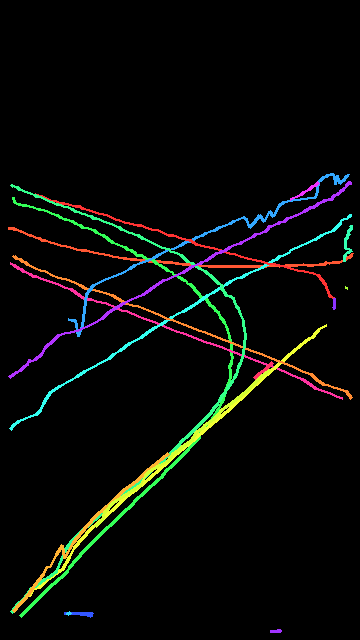

: 

In [ ]:

image = Image.new("RGB", (vid_width, vid_height), "black")
draw = ImageDraw.Draw(image)

color_i = 0

for id, data in data_by_id_cleaned.items():
  # for box in data["bb"]:
  #   draw.rectangle(box, outline="blue", width=1)
  points = data["center_points"]
  
  prev = None
  for point in points:
    # draw.circle(circle, radius=5, fill="blue", outline="black")
    if prev is not None:
      draw.line((prev[0], prev[1], point[0], point[1]), fill=colors[color_i], width=3)

    prev = point
    
  color_i = (color_i + 1) % len(colors)


display(image)
